### 讀取數據

In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 先在matlab用writetable(X,'Xtrain.txt')將data轉為txt格式
# 處理數據格式
with open('Xtrain.txt', "r") as f:
    X = f.read().splitlines()

X = np.array(X).astype(dtype=float)
# 排序:argsort函数根据array1的值返回了一个索引数组sorted_indices
sorted_indices = np.argsort(X)
X = X[sorted_indices]
X = X.reshape(-1, 1)

with open('Ytrain.txt', "r") as f:
    y = f.read().splitlines()
y = np.array(y).astype(dtype=float)
y = y[sorted_indices]
y = y.reshape(-1, 1)
#print(X)
#print(y)


### Problem 1

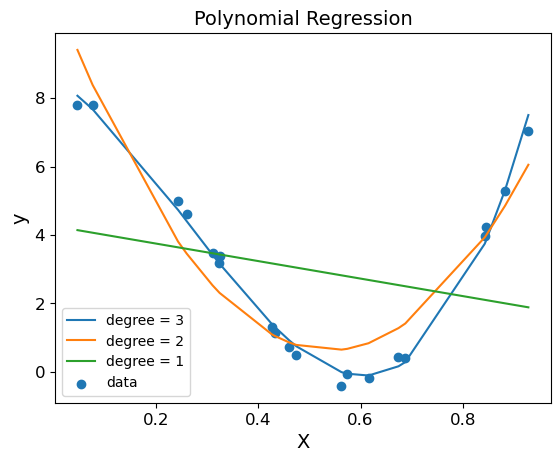

score (degree=3)= 0.992
score (degree=2)= 0.8969
score (degree=1)= 0.06


In [75]:
#Polynomial Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


# degree=3
regressor = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
regressor.fit(X, y)
plt.plot(X, regressor.predict(X),  label = "degree = 3")
score3=regressor.score(X,y)

# degree=2
regressor = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
regressor.fit(X, y)
plt.plot(X, regressor.predict(X), label = "degree = 2")
score2=regressor.score(X,y)

# degree=1
regressor = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
regressor.fit(X, y)
score1=regressor.score(X,y)

plt.plot(X, regressor.predict(X), label = "degree = 1")
plt.scatter(X, y, label='data')
plt.tick_params(labelsize=12)
plt.title("Polynomial Regression",fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('y',fontsize=14)
plt.legend()
plt.show()


print('score (degree=3)=',round(score3,4))    
print('score (degree=2)=',round(score2,4)) 
print('score (degree=1)=',round(score1,4)) 

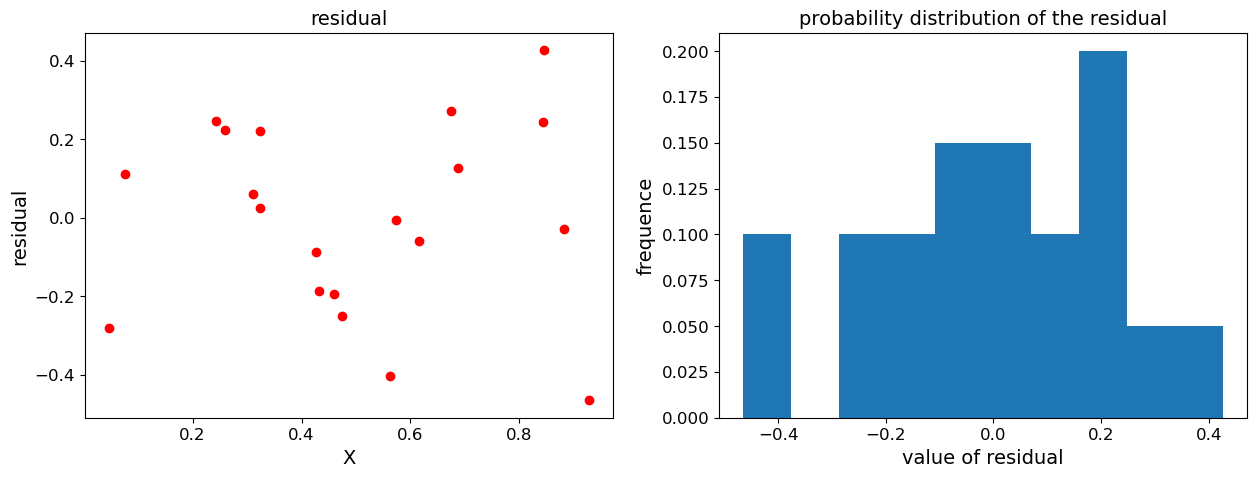

In [86]:
# 觀察residual是否跟x無關>>independent
regressor = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
regressor.fit(X, y)
def residual(X,y):
    residual = []
    pred = regressor.predict(X)
    for i in range(0,20):
        residual.append(float(y[i]-pred[i]))
    return residual

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.scatter(X,residual(X,y), color = 'red')
plt.tick_params(labelsize=12)
plt.title("residual",fontsize=14)
plt.xlabel('X',fontsize=14)
plt.ylabel('residual',fontsize=14)

# 觀察殘差直方圖是否呈常態分佈 
# # https://online.stat.psu.edu/stat501/lesson/4/4.6
# http://140.116.77.14/mate/lab2/Course/982sta/ch4%E5%B7%A5%E7%A8%8B%E7%B5%B1%E8%A8%88(98).pdf
##print('max = ',np.array(residual(X,y)).max())
##print('min = ',np.array(residual(X,y)).min())

A = np.array(residual(X,y))
plt.subplot(122)

# plt.hist(density=True)機率何不為1，因此增加weights
weights=np.ones_like(A)/float(len(A))
plt.hist(A,weights=weights)
plt.tick_params(labelsize=12)
plt.title("probability distribution of the residual",fontsize=14)
plt.xlabel('value of residual',fontsize=14)
plt.ylabel('frequence',fontsize=14)

plt.show()


In [20]:
# calculate mean of residual
def residual(X,y,n):
    residual = []
    regressor = make_pipeline(PolynomialFeatures(degree=n), LinearRegression())
    regressor.fit(X, y)
    pred = regressor.predict(X)
    for i in range(0,20):
        residual.append(float(y[i]-pred[i]))
    return residual

# degree = 3

A = np.array(residual(X,y,3))
sum = 0
for i in range(0,len(A)):
    sum = sum + A[i]
print('mean (degree=3) = ',round(sum/len(A),4))

# degree = 2
regressor = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
regressor.fit(X, y)
A = np.array(residual(X,y,2))
sum = 0
for i in range(0,len(A)):
    sum = sum + A[i]
print('mean (degree=2) = ',round(sum/len(A),4))

# degree = 2
regressor = make_pipeline(PolynomialFeatures(degree=1), LinearRegression())
regressor.fit(X, y)
A = np.array(residual(X,y,1))
sum = 0
for i in range(0,len(A)):
    sum = sum + A[i]
print('mean (degree=1) = ',round(sum/len(A),4))

mean (degree=3) =  0.0
mean (degree=2) =  0.0
mean (degree=1) =  -0.0


### Problem 3

#### (a) Generate a scatter plot of the yields vs maturity. Comment on the figures

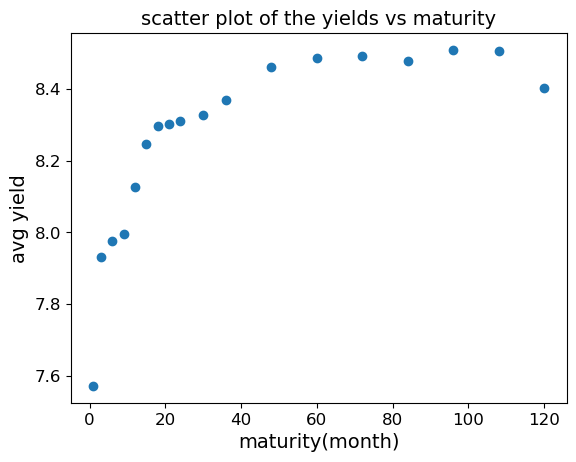

In [123]:
import matplotlib.pyplot as plt
import numpy as np
month = np.array([1, 3, 6, 9, 12, 15, 18, 21, 24, 30, 36, 48, 60, 72, 84, 96, 108, 120])
list_yield = np.array([7.571, 7.931, 7.977, 7.996, 8.126, 8.247, 8.298, 8.304, 8.311, 8.327, 8.369, 8.462, 8.487, 8.492, 8.479, 8.510, 8.507, 8.404])
plt.scatter(month, list_yield)
plt.xlabel('maturity(month)',fontsize=14)
plt.ylabel('avg yield',fontsize=14)
plt.tick_params(labelsize=12)
plt.title('scatter plot of the yields vs maturity',fontsize=14)
plt.show()

#### (b) You want to fit a polynomial regression model to the data. Since you don't know the order you need, you fit six polynomial models, with orders from 1 to 6. Plot the 𝑅^2 vs the polynomial order 𝑘. Comment on the result.

score(degree=1)= 0.5386415469926811
score(degree=2)= 0.8400932139931148
score(degree=3)= 0.907182472094198
score(degree=4)= 0.9488539227039006
score(degree=5)= 0.9565264503055332
score(degree=6)= 0.9665523549723629


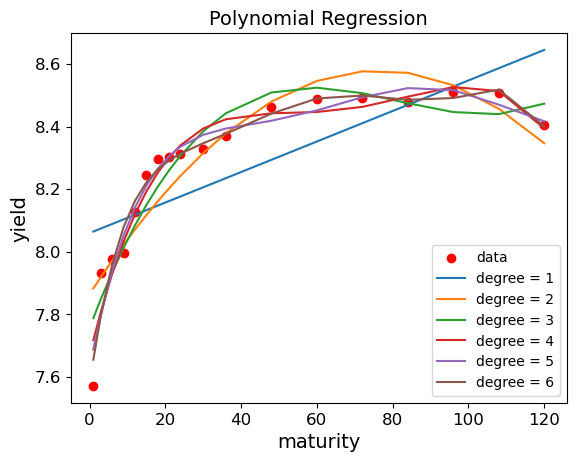

In [124]:
#順便畫的
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X = month.reshape(-1, 1)
y = list_yield.reshape(-1, 1)

# model of 1 degree：PolynomialFeatures(維度)
regressor = make_pipeline(PolynomialFeatures(degree = 1), LinearRegression())
regressor.fit(X, y)
score_list = []
plt.scatter(X, y, color = 'red', label = "data")
plt.plot(X, regressor.predict(X), label = "degree = 1")
plt.tick_params(labelsize=12)
plt.title("Polynomial Regression",fontsize=14)
plt.xlabel('maturity',fontsize=14)
plt.ylabel('yield',fontsize=14)
score_list.append(regressor.score(X,y))
print('score(degree=1)=',regressor.score(X,y))

# model of 2 degree：PolynomialFeatures(維度)
regressor = make_pipeline(PolynomialFeatures(degree = 2), LinearRegression())
regressor.fit(X, y)
plt.plot(X, regressor.predict(X), label = "degree = 2")
score_list.append(regressor.score(X,y))
print('score(degree=2)=',regressor.score(X,y))

# model of 3 degree：PolynomialFeatures(維度)
regressor = make_pipeline(PolynomialFeatures(degree = 3), LinearRegression())
regressor.fit(X, y)
plt.plot(X, regressor.predict(X), label = "degree = 3")
score_list.append(regressor.score(X,y))
print('score(degree=3)=',regressor.score(X,y))

# model of 4 degree：PolynomialFeatures(維度)
regressor = make_pipeline(PolynomialFeatures(degree = 4), LinearRegression())
regressor.fit(X, y)
plt.plot(X, regressor.predict(X), label = "degree = 4")
score_list.append(regressor.score(X,y))
print('score(degree=4)=',regressor.score(X,y))

# model of 5 degree：PolynomialFeatures(維度)
regressor = make_pipeline(PolynomialFeatures(degree = 5), LinearRegression())
regressor.fit(X, y)
plt.plot(X, regressor.predict(X), label = "degree = 5")
score_list.append(regressor.score(X,y))
print('score(degree=5)=',regressor.score(X,y))

# model of 6 degree：PolynomialFeatures(維度)
regressor = make_pipeline(PolynomialFeatures(degree=6), LinearRegression())
regressor.fit(X, y)
plt.plot(X, regressor.predict(X), label = "degree = 6")
score_list.append(regressor.score(X,y))
print('score(degree=6)=',regressor.score(X,y))
plt.tick_params(labelsize=12)
plt.legend()
plt.show()

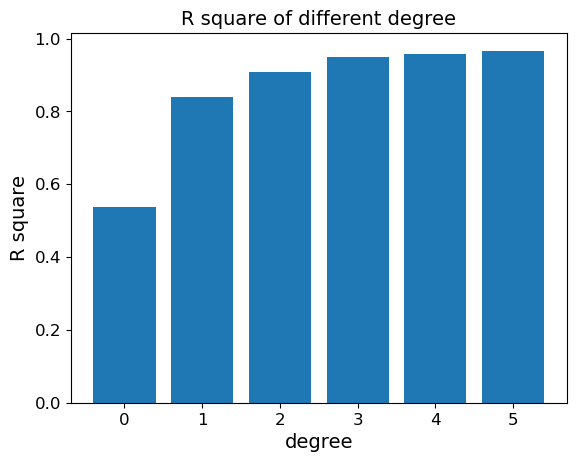

In [127]:
# plot score 
score=np.array(score_list)
plt.bar(np.arange(0,6,1),score)
plt.xlabel('degree',fontsize=14)
plt.ylabel('R square',fontsize=14)
plt.title('R square of different degree',fontsize=14)
plt.tick_params(labelsize=12)
plt.show()

#### (c) For the 4th-order polynomial model, draw a residual plot (vs maturity).

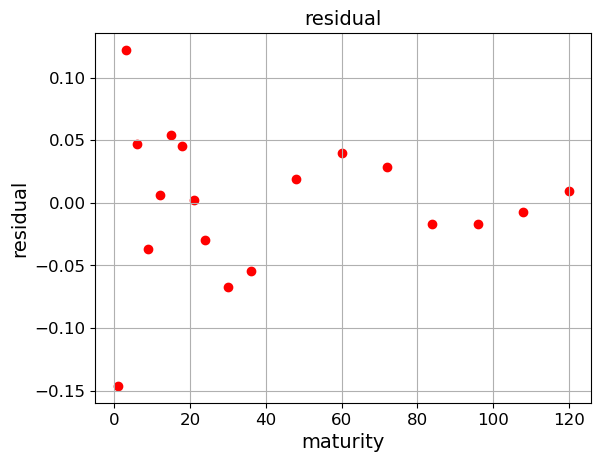

In [128]:
def residual(X,y):
    residual = []
    pred = regressor.predict(X)
    for i in range(0,len(X)):
        residual.append(float(y[i]-pred[i]))
    return residual

regressor = make_pipeline(PolynomialFeatures(degree = 4), LinearRegression())
regressor.fit(X, y)

plt.scatter(X,residual(X,y), color = 'red')
plt.tick_params(labelsize=12)
plt.title("residual",fontsize=14)
plt.xlabel('maturity',fontsize=14)
plt.ylabel('residual',fontsize=14)
plt.grid()
plt.show()

#### (d) Draw a histogram and a quantile-quantile (Q-Q) plot of the residuals.

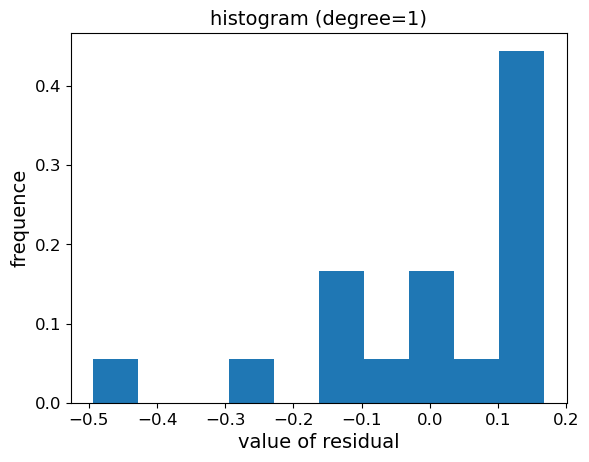

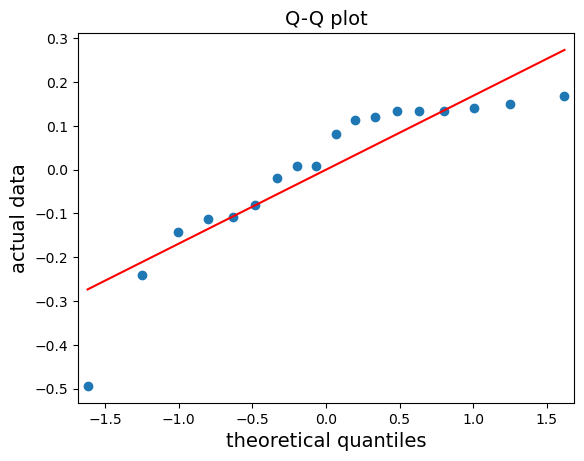

In [118]:
import statsmodels.api as sm
def residual(X,y,n):
    # model
    regressor = make_pipeline(PolynomialFeatures(degree = n), LinearRegression())
    regressor.fit(X, y)
    pred = regressor.predict(X)
    residual = []
    # calculate risdual
    for i in range(0,len(X)):
        residual.append(float(y[i]-pred[i]))
    return residual

# degree=1
y_residual=np.array(residual(X,y,1)).reshape(1,18)[0][:]
weights=np.ones_like(y_residual)/float(len(y_residual))


plt.tick_params(labelsize=12)
plt.hist(y_residual,weights=weights)
plt.title("histogram (degree=1)",fontsize=14)
plt.ylabel('frequence',fontsize=14)
plt.xlabel('value of residual',fontsize=14)
plt.show()

sm.qqplot(y_residual, line='s')
plt.title("Q-Q plot",fontsize=14)
plt.ylabel('actual data',fontsize=14)
plt.xlabel('theoretical quantiles',fontsize=14)
plt.show()

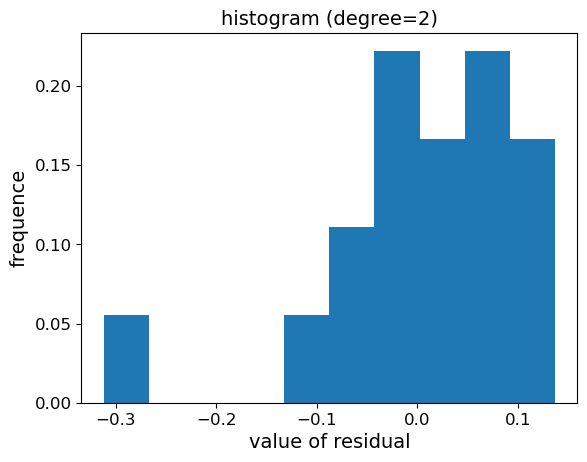

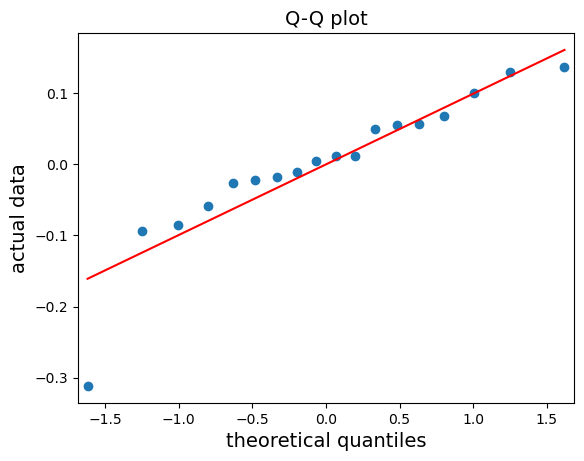

In [117]:
# degree=2
degree=2
y_residual=np.array(residual(X,y,degree)).reshape(1,18)[0][:]
weights=np.ones_like(y_residual)/float(len(y_residual))

plt.tick_params(labelsize=12)
plt.hist(y_residual,weights=weights)
plt.title("histogram (degree="+str(degree)+")",fontsize=14)
plt.ylabel('frequence',fontsize=14)
plt.xlabel('value of residual',fontsize=14)
plt.show()

fig=sm.qqplot(y_residual, line='s')
plt.title("Q-Q plot",fontsize=14)
plt.ylabel('actual data',fontsize=14)
plt.xlabel('theoretical quantiles',fontsize=14)
plt.show()

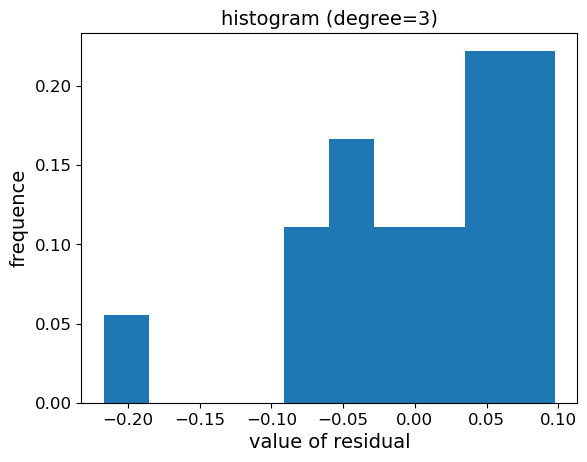

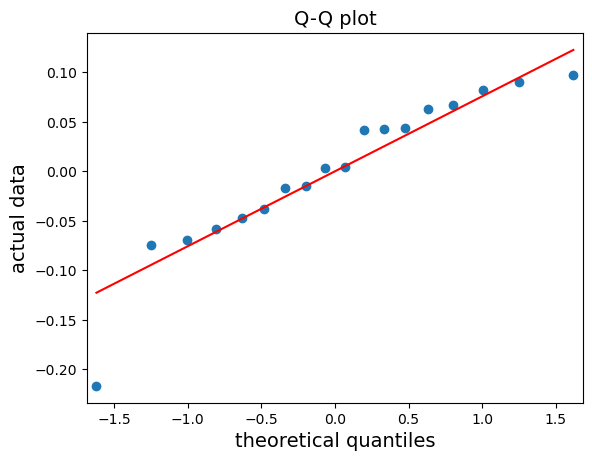

In [119]:
# degree=3
degree=3
y_residual=np.array(residual(X,y,degree)).reshape(1,18)[0][:]
weights=np.ones_like(y_residual)/float(len(y_residual))

plt.tick_params(labelsize=12)
plt.hist(y_residual,weights=weights)
plt.title("histogram (degree="+str(degree)+")",fontsize=14)
plt.ylabel('frequence',fontsize=14)
plt.xlabel('value of residual',fontsize=14)
plt.show()

fig=sm.qqplot(y_residual,line='s')
plt.title("Q-Q plot",fontsize=14)
plt.ylabel('actual data',fontsize=14)
plt.xlabel('theoretical quantiles',fontsize=14)
plt.show()

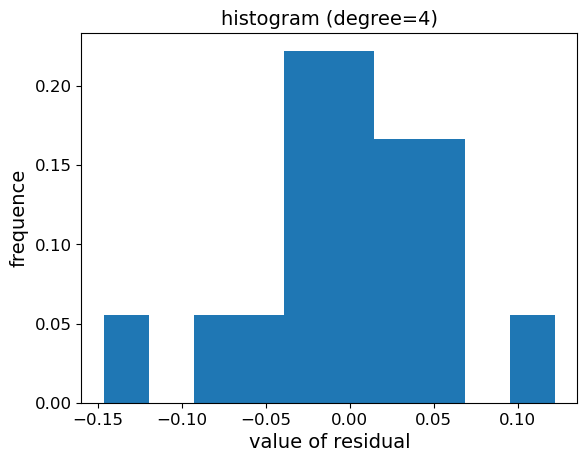

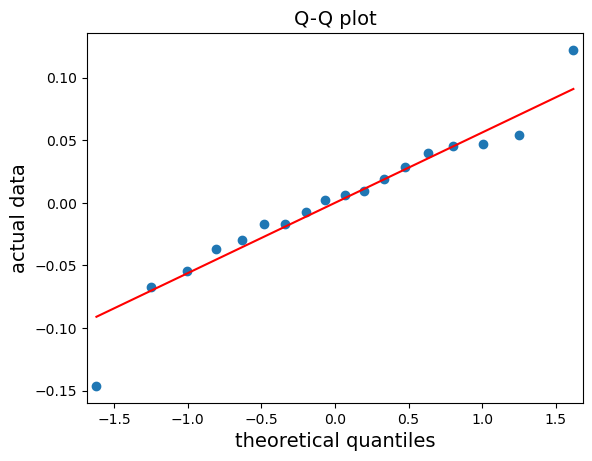

In [120]:
# degree=4
degree=4
y_residual=np.array(residual(X,y,degree)).reshape(1,18)[0][:]
weights=np.ones_like(y_residual)/float(len(y_residual))

plt.tick_params(labelsize=12)
plt.hist(y_residual,weights=weights)
plt.title("histogram (degree="+str(degree)+")",fontsize=14)
plt.ylabel('frequence',fontsize=14)
plt.xlabel('value of residual',fontsize=14)
plt.show()

fig=sm.qqplot(y_residual, line='s')
plt.title("Q-Q plot",fontsize=14)
plt.ylabel('actual data',fontsize=14)
plt.xlabel('theoretical quantiles',fontsize=14)
plt.show()

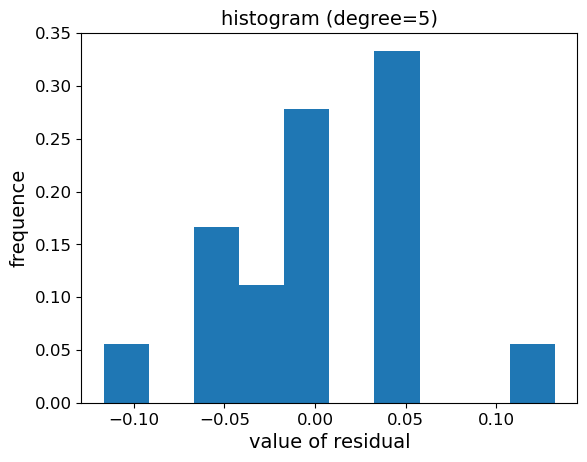

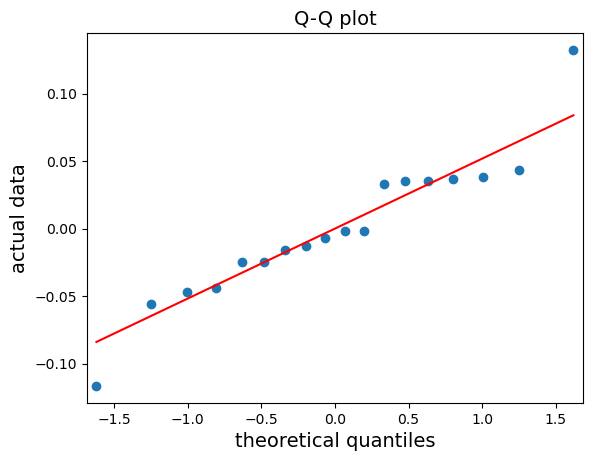

In [121]:
# degree=5
degree=5
y_residual=np.array(residual(X,y,degree)).reshape(1,18)[0][:]
weights=np.ones_like(y_residual)/float(len(y_residual))

plt.tick_params(labelsize=12)
plt.hist(y_residual,weights=weights)
plt.title("histogram (degree="+str(degree)+")",fontsize=14)
plt.ylabel('frequence',fontsize=14)
plt.xlabel('value of residual',fontsize=14)
plt.show()

fig=sm.qqplot(y_residual, line='s')
plt.title("Q-Q plot",fontsize=14)
plt.ylabel('actual data',fontsize=14)
plt.xlabel('theoretical quantiles',fontsize=14)
plt.show()

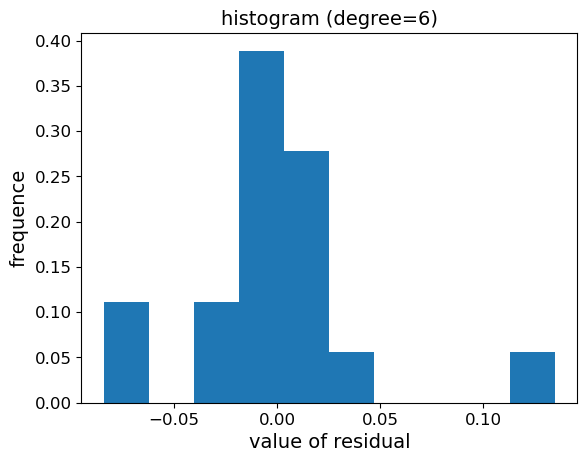

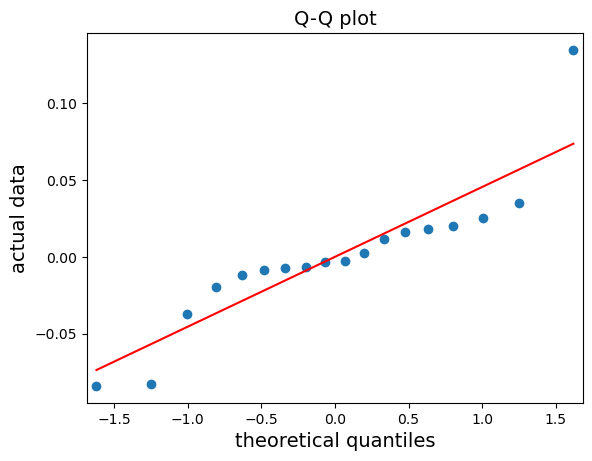

In [122]:
# degree=6
degree=6
y_residual=np.array(residual(X,y,degree)).reshape(1,18)[0][:]
weights=np.ones_like(y_residual)/float(len(y_residual))

plt.tick_params(labelsize=12)
plt.hist(y_residual,weights=weights)
plt.title("histogram (degree="+str(degree)+")",fontsize=14)
plt.ylabel('frequence',fontsize=14)
plt.xlabel('value of residual',fontsize=14)
plt.show()

fig=sm.qqplot(y_residual, line='s')
plt.title("Q-Q plot",fontsize=14)
plt.ylabel('actual data',fontsize=14)
plt.xlabel('theoretical quantiles',fontsize=14)
plt.show()